# Testing production and degradation on ABC

In [1]:
import pints
import pints.toy as toy
import pints.toy.stochastic
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

(100, 4)


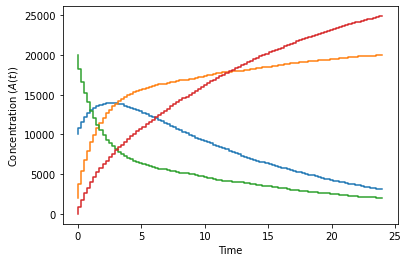

In [2]:
x_0 = [1e4, 2e3, 2e4, 0]
model = pints.toy.stochastic.MichaelisMentenModel(x_0)

times = np.linspace(0, 24, 100)
k = [1e-5, 0.2, 0.2]


values = model.simulate(k, times)
print(values.shape)
# print("s = (" + str(len(times)) + ", " + str(model.n_outputs()) + ")")
problem = pints.MultiOutputProblem(model, times, values)
error_measure = pints.MeanSquaredError(problem)

log_prior = pints.UniformLogPrior([5e-6, 0.05, 0.1], [2e-5, 0.3, 0.4])

plt.step(times, values)
plt.xlabel('Time')
plt.ylabel(r'Concentration ($A(t)$)')
plt.show()

# Rejection ABC

In [10]:
abc = pints.ABCController(error_measure, log_prior)

# set threshold
abc.sampler().set_threshold(7e5)

abc.set_parallel(True)

# set target number of samples
abc.set_n_samples(100)

# log to screen
abc.set_log_to_screen(True)

print('Running...')
samples  = abc.run()
print('Done')

Running...
Using Rejection ABC
Running in parallel with 8 worker processess.
Iter. Eval. Acceptance rate Time m:s
1     8      0.125            0:09.2
2     16     0.125            0:14.2
3     48     0.0625           0:34.7
20    440    0.05             4:17.7
40    928    0.0506465517     8:47.0
60    1336   0.0531437126    12:31.8
80    1776   0.0540540541    16:40.7
cnt_sampled=1864
Halting: target number of samples (100) reached.
Done


In [11]:
samples_flat = np.array([item for sublist in samples for item in sublist])

print(len(samples_flat))

800


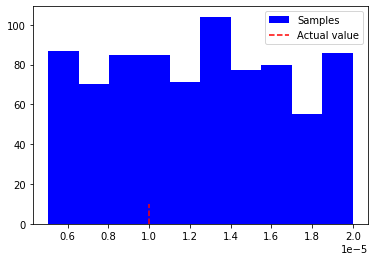

In [12]:
samples_flat = np.array([item for sublist in samples for item in sublist])

plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

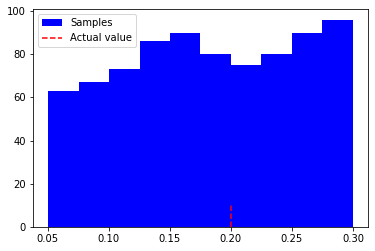

In [13]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

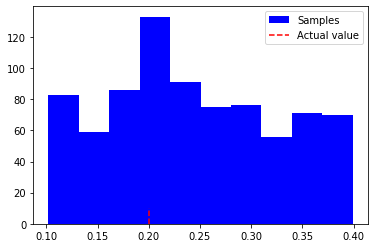

In [14]:
plt.hist(samples_flat[:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# ABC SMC

In [18]:
np.random.seed(2)
abc = pints.ABCController(error_measure, log_prior, method=pints.ABCSMC)
# set initial threshold
abc.sampler().set_threshold_schedule(np.array([2e6, 1e6, 7e5]))

# produce intermediate distributions of size 200
abc.sampler().set_intermediate_size(20)

# set target number of samples
abc.set_n_samples(100)

# log to screen
abc.set_log_to_screen(True)

samples = abc.run()
print("Done")

Using ABC-SMC
Running in sequential mode.
Trying t=1, threshold=1000000.0
Trying t=2, threshold=700000.0
Iter. Eval. Acceptance rate Time m:s
1     240    0.00416666667   10:29.6
2     241    0.00829875519   10:33.3
3     247    0.012145749     10:59.7
20    357    0.056022409     17:30.1
40    494    0.0809716599    25:38.5
60    621    0.0966183575    33:05.4
80    748    0.106951872     40:09.6
100   918    0.108932462     50:04.5
cnt_sampled=918
Halting: target number of samples (100) reached.
Done


In [20]:
samples_flat = np.array([item for sublist in samples for item in sublist])

print(len(samples_flat))

300


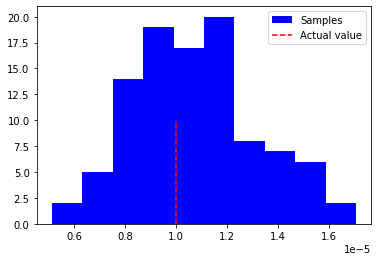

In [29]:
samples_flat = np.array([sublist for sublist in samples])

plt.hist(samples_flat[:,0], color="blue", label="Samples")
plt.vlines(x=1e-5, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

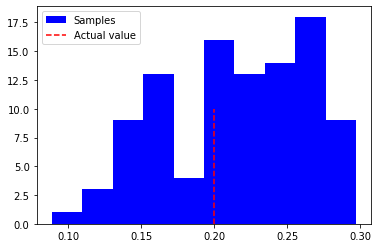

In [27]:
plt.hist(samples_flat[:,1], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

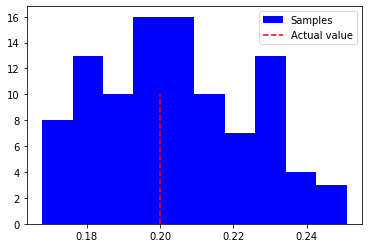

In [30]:
plt.hist(samples_flat[:,2], color="blue", label="Samples")
plt.vlines(x=0.2, linestyles='dashed', ymin=0, ymax=10, label="Actual value", color="red")
plt.legend()
plt.show()

# Save samples

In [15]:
samples_rej = samples

In [16]:
print(samples_rej.tolist())

[[[1.7218607966502307e-05, 0.2151286164330648, 0.3840104649455428], [1.0382104768741729e-05, 0.06936686091210993, 0.18064277948223587], [1.884757545232839e-05, 0.24033054536306547, 0.38003351781710126], [7.4204705585984225e-06, 0.27224523032402037, 0.30309522021510704], [1.449202273972625e-05, 0.24607109176257502, 0.2036255264807837], [1.408641694944841e-05, 0.18819669609720863, 0.3646594072627092], [9.068393587090056e-06, 0.21484401786362894, 0.305292706558359], [1.3812616679627142e-05, 0.16535686650581488, 0.32942875982785264]], [[5.95363131134847e-06, 0.29279984585617597, 0.10976477219298064], [1.9519229545733404e-05, 0.1318247778836028, 0.30834984917793373], [1.6562870620199857e-05, 0.20258185573408216, 0.3798616386922581], [1.2797772575139425e-05, 0.19033811089050934, 0.22284985568384363], [1.969272278951124e-05, 0.061604343310898604, 0.19710440211647162], [1.2555233810180748e-05, 0.19582067654009566, 0.2129872575231531], [5.421821913907721e-06, 0.06261367607578576, 0.345912670836

In [31]:
samples_pmc_mod = samples

In [32]:
print(samples_pmc_mod.tolist())

[[1.3391961792958835e-05, 0.27816416275693423, 0.19163852055703468], [8.70293819816332e-06, 0.1552737956383505, 0.2062368618994653], [8.312688677567844e-06, 0.13344035045476327, 0.21156208519811487], [9.438017728967207e-06, 0.17977590164234886, 0.21121771746921658], [6.370571525785888e-06, 0.13139579758405373, 0.23256598865848457], [9.539032312139595e-06, 0.24022194975097408, 0.20114200430508758], [1.3774130566359147e-05, 0.2262302401002195, 0.1747806491162513], [1.7052338753461905e-05, 0.2872311411112358, 0.19708779557311673], [1.314300202467875e-05, 0.2491880567103759, 0.19075483316469666], [1.2416577668871137e-05, 0.2680918550464564, 0.22796751778404128], [1.1260069211709954e-05, 0.2763374029644534, 0.20505178421149872], [9.096770149723467e-06, 0.16936992849806126, 0.18365754458332387], [1.1173304619793697e-05, 0.2913323084714012, 0.24071815321075968], [1.5005104985403818e-05, 0.23429755407123415, 0.16821304471046603], [1.0038484416324195e-05, 0.21125227171455493, 0.2285018134212411